# Simulating and Estimating a Multinomial Logit Model with SciPy

(some motivation to come later)

In [1]:
import numpy as np
from scipy import optimize as opt

In [25]:
# Model Primitives
np.random.seed(1234567890)

nObs = 10000
beta1 = [0.5, 0.25]
beta2 = [0.5, 0.75]
beta = np.column_stack((beta1, beta2))
income= np.random.uniform(size = nObs) # draws from standard normal
explVar = np.column_stack((np.ones(nObs), income))

In [26]:
beta

array([[ 0.5 ,  0.5 ],
       [ 0.25,  0.75]])

In [3]:
def simulateMultinomialLogit(x, beta):
    nObs, nExplVar = x.shape
    nChoice  = beta.shape[1] + 1 # add the outside option
    
    epsilon = np.random.gumbel(size = [nObs, nChoice])
    beta_augmented = np.column_stack([np.zeros(beta.shape[0]), beta])
    utility = x @ beta_augmented + epsilon
    choice = np.argmax(utility, axis=1)
    return  choice, utility

In [4]:
choice, utility = simulateMultinomialLogit(explVar, beta)

## Plot Choices in a 2D diagram

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

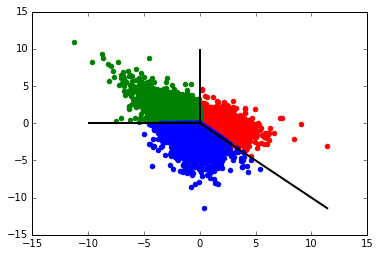

In [7]:
fig, ax = plt.subplots()
ax.scatter(utility[(choice==0), 0] - utility[(choice==0), 1], utility[(choice==0), 1] - utility[(choice==0), 2], color='r')
ax.scatter(utility[(choice==1), 0] - utility[(choice==1), 1], utility[(choice==1), 1] - utility[(choice==1), 2], color='g')
ax.scatter(utility[(choice==2), 0] - utility[(choice==2), 1], utility[(choice==2), 1] - utility[(choice==2), 2], color='b')
plt.vlines(x=min(utility[(choice==0), 0] - utility[(choice==0), 1]), ymin=0, ymax=10, color='k', lw=2.0 )
plt.hlines(y=min(utility[(choice==0), 0] - utility[(choice==0), 2]), xmin=-10, xmax=0, color='k', lw=2.0)
plt.plot([0, max(utility[(choice==0), 0] - utility[(choice==0), 1])], 
         [0,-max(utility[(choice==0), 0] - utility[(choice==0), 1])], color='k', lw=2.0)


In [57]:
beta_g1 = [1, 2]
beta_g2 = [3, 4]
beta_g = np.column_stack((beta_g1, beta_g2))
print(beta_g)

def logLike_multinomialLogit(beta, y, x):
    
    nObs, nExplVar = x.shape
    choices = np.unique(y)
    nChoices = choices.shape[0]
    
    beta_wide = beta.reshape(nExplVar, nChoices-1)
    beta_aug  = np.vstack([np.zeros(beta_wide.shape[0]), beta_wide])
    
    linearIndex = x @ beta_aug.T
    
    def softmax(z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T
    
    choiceProb = softmax(linearIndex)
    
    for iChoice in choices:
        print(iChoice)
        choiceIdx = np.zero
#       choiceIdx(:, count)     = (y == count);

    #     choiceProb   = logistic.cdf(x @ beta);
    
#     ll_i         = np.log( (y==1) * (choiceProb) + (y==0) * (1 - choiceProb))
#     logLike      = -(ll_i.sum())
#     return logLike
    return choiceProb

[[1 3]
 [2 4]]


In [58]:
logLike_multinomialLogit(beta_g, choice, explVar)

0
1
2


array([[ 0.00941541,  0.16381412,  0.82677047],
       [ 0.01043802,  0.16738994,  0.82217204],
       [ 0.00334946,  0.13095454,  0.865696  ],
       ..., 
       [ 0.01051318,  0.16764062,  0.8218462 ],
       [ 0.05442067,  0.22832294,  0.71725639],
       [ 0.00625569,  0.15014889,  0.84359542]])

In [37]:
xx

array([[ 0.,  0.],
       [ 1.,  3.],
       [ 2.,  4.]])

In [23]:
beta.reshape(1, 4).reshape(2,2)

array([[ 0.5 ,  0.5 ],
       [ 0.25,  0.75]])